Clara Ross Independent Study

9/28/2021 - 10/4/2021

pymiescatt examples


In [167]:
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Mie Scattering for Single Particles

### MieQ
Computes Mie efficencies Q and asymmetry parameter g of a single, homogeneous particle.

Input parameters:
MieQ(m, wavelength, diameter[, nMedium=1.0, asDict=False, asCrossSection=False])
- m: The complex refractive index, with the convention m = n+ik.
- wavelength: The wavelength of incident light, in nanometers.
- diameter: The diameter of the particle, in nanometers.
- nMedium: The refractive index of the surrounding medium. This must be positive, nonzero, and real. Any imaginary part will be discarded.
- asDict: If specified and set to True, returns the results as a dict.
- asCrossSection: If specified and set to True, returns the results as optical cross-sections with units of $nm^2$.


In [168]:
m = 1.5+0.5j # refractive index
w = 532 #[nm]
d = 200 #[nm]
ps.MieQ(m,w,d,asDict=True)

{'Qext': 1.693237598485073,
 'Qsca': 0.4725443528128364,
 'Qabs': 1.2206932456722366,
 'g': 0.3153569918620273,
 'Qpr': 1.5442174328606284,
 'Qback': 0.25575930719896567,
 'Qratio': 0.5412387338385268}

### RayleighMieQ

If $x=\pi\,d_p/\lambda \ll 1$, use RayleighMieQ to compute Mie efficencies in the Rayleigh limit

Computes Mie efficencies of a spherical particle in the Rayleigh regime $x=\pi\,d_p/\lambda \ll 1$ given refractive index m, wavelength, and diameter. 

RayleighMieQ(m, wavelength, diameter[, nMedium=1.0, asDict=False, asCrossSection=False])

In [169]:
m = 1.5+0.5j # refractive index
w = 532 #[nm]
d = 20 #[nm]

print(np.pi*d/w)
ps.RayleighMieQ(m,lam,d,asDict=True)

0.11810498697705989


{'Qext': 0.11657950835758038,
 'Qsca': 9.239791445283349e-05,
 'Qabs': 0.11648711044312755,
 'g': 0,
 'Qpr': 0.11657950835758038,
 'Qback': 0.00013859687167925024,
 'Qratio': 1.5}

### AutoMieQ

Returns Mie efficencies of a spherical particle according to either MieQ() or RayleighMieQ() depending on the magnitude of the size parameter. Good for studying parameter ranges or size distributions.

AutoMieQ(m, wavelength, diameter[, nMedium=1.0, crossover=0.01, asDict=False, asCrossSection=False])


# single particles across various ranges


### Diameter dependence

MieQ_withDiameterRange(m, wavelength[, nMedium=1.0, diameterRange=(10, 1000), nd=1000, logD=False])

Computes the Mie efficencies of particles across a diameter range using AutoMieQ().

input parameters:
- diameterRange: (tuple or list, optional) The diameter range, in nanometers. Convention is (smallest, largest). Defaults to (10, 1000).
- nd: (int, optional) The number of diameter bins in the range. Defaults to 1000.
- logD: (bool, optional) If True, will use logarithmically-spaced diameter bins. Defaults to False.

Returns
- diameters: (numpy.ndarray) An array of the diameter bins that calculations were performed on. Size is equal to nd.
- qext, qsca, qabs, g, qpr, qback, qratio: (numpy.ndarray) The Mie efficencies at each diameter in diameters.

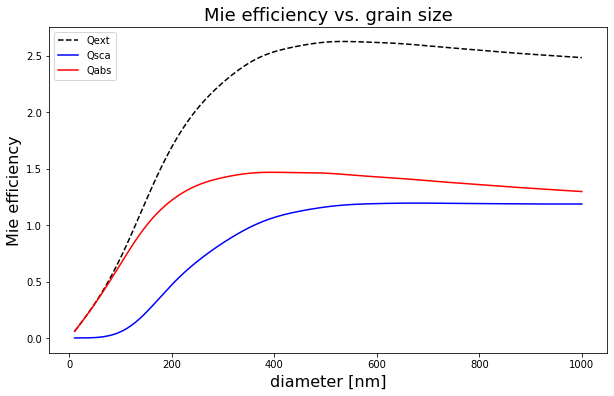

In [170]:
m = 1.5+0.5j # refractive index
w = 532 #[nm]
dRange = (10,1000) #[nm]
ndp = 1000 

diameters,qext,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withDiameterRange(m,w,diameterRange=dRange,nd=ndp)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(diameters,qext,'k',ls='dashed',label="Qext")
ax1.plot(diameters,qsca,'b',label="Qsca")
ax1.plot(diameters,qabs,'r',label="Qabs")

ax1.set_xlabel("diameter [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
ax1.set_title("Mie efficiency vs. grain size",fontsize=18)
ax1.legend()


### Wavelength dependence

MieQ_withWavelengthRange(m, diameter[, nMedium=1.0, wavelengthRange=(100, 1600), nw=1000, logW=False])

Computes the Mie efficencies of particles across a wavelength range using AutoMieQ(). This function can optionally take a list, tuple, or numpy.ndarray for m. If your particles have a wavelength-dependent refractive index, you can study it by specifying m as list-like. When doing so, m must be the same size as wavelengthRange, which is also specified as list-like in this situation. Otherwise, the function will construct a range from wavelengthRange[0] to wavelengthRange[1] with nw entries.

inputs 

- wavelengthRange: (tuple or list, optional) The wavelength range of incident light, in nanomaters. Convention is (smallest, largest). Defaults to (100, 1600). When m is list-like, len(wavelengthRange) must be equal to len(m).
- nw: (int, optional) The number of wavelength bins in the range. Defaults to 1000. This parameter is ignored if m is list-like.
- logW: (bool, optional) If True, will use logarithmically-spaced wavelength bins. Defaults to False. This parameter is ignored if m is list-like.

returns

- wavelengths: (numpy.ndarray) An array of the wavelength bins that calculations were performed on. Size is equal to nw, unless m was list-like. Then wavelengths = wavelengthRange.
- qext, qsca, qabs, g, qpr, qback, qratio: (numpy.ndarray) The Mie efficencies at each wavelength in wavelengths.



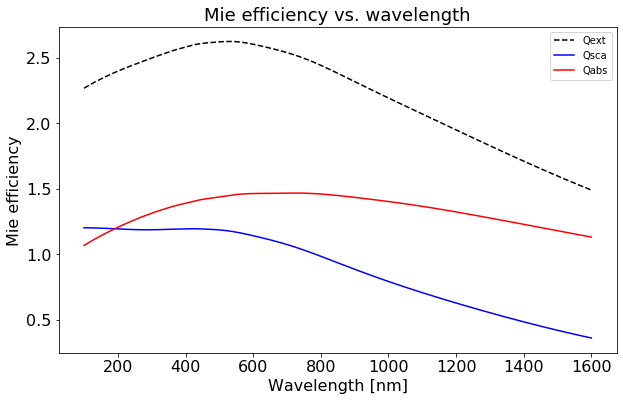

In [181]:
m = 1.5+0.5j # refractive index
d = 500 #[nm]
wRange = (100,1600) #[nm]

wavelengths,qext,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange(m,w,wavelengthRange=wRange)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(wavelengths,qext,'k',ls='dashed',label="Qext")
ax1.plot(wavelengths,qsca,'b',label="Qsca")
ax1.plot(wavelengths,qabs,'r',label="Qabs")

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Mie efficiency vs. wavelength",fontsize=18)
ax1.legend()



- size parameter ($x = \pi d_p /\lambda$): MieQ_withSizeParameterRange(m[, nMedium=1.0, xRange=(1, 10), nx=1000, logX=False])

size distributions of homogeneous spheres 
- efficiency Q integrated over size distribution $n_d(d_p)$

# Angular Functions and Polarization

"These functions compute the angle-dependent scattered field intensities and scattering matrix elements. They return arrays that are useful for plotting"

### ScatteringFunction - single particle scattering intensity vs. angle
Plot the angular scattering intensity functions vs. angle for a single particle (for parallel, perpendicular, and unpolarized light) 

ScatteringFunction(m, wavelength, diameter[, nMedium=1.0, minAngle=0, maxAngle=180, angularResolution=0.5, space='theta', angleMeasure='radians', normalization=None])

Optional Input parameters:
- minAngle: (float, optional) The minimum scattering angle (in degrees) to be calculated. Defaults to 0.
- maxAngle: (float, optional) The maximum scattering angle (in degrees) to be calculated. Defaults to 180.
- angularResolution: (float, optional) The resolution of the output. Defaults to 0.5, meaning a value will be calculated for every 0.5 degrees.
- space: (str, optional) The measure of scattering angle. Can be ‘theta’ or ‘qspace’. Defaults to ‘theta’.
- angleMeasure: (str, optional) The units for the scattering angle
- normalization: (str or None, optional) Specifies the normalization method, which is either by total signal or maximum signal.
    - normalization = ‘t’ will normalize by the total integrated signal, that is, the total signal will have an integrated value of 1.
    - normalization = ‘max’ will normalize by the maximum value of the signal regardless of the angle at which it occurs, that is, the maximum signal at that angle will have a value of 1.

Outputs: Returns arrays that can be used to plot the scattering intensity of perpendicular, parallel, and unpolarized light vs. angle
- theta: (numpy.ndarray) An array of the angles used in calculations. Values will be spaced according to angularResolution, and the size of the array will be (maxAngle-minAngle)/angularResolution.
- SL: (numpy.ndarray) An array of the scattered intensity of left-polarized (perpendicular) light. Same size as the theta array.
- SR: (numpy.ndarray) An array of the scattered intensity of right-polarized (parallel) light. Same size as the theta array.
- SU: (numpy.ndarray) An array of the scattered intensity of unpolarized light, which is the average of SL and SR. Same size as the theta array.

theta space: geometric angle (in radians)

Q space: https://www.sciencedirect.com/science/article/pii/S0022407313000083
plotting scattering intensity vs. scattering wave vector $q = \frac{4 \pi}{\lambda}sin(\frac{\theta}{2})$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


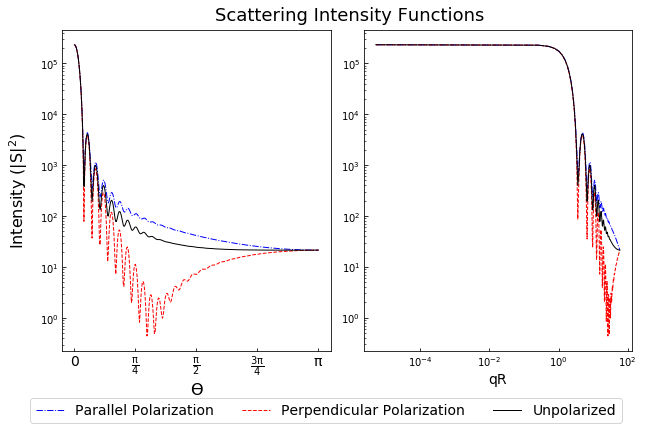

In [171]:
# example: calculate angle-dependent scattering functions for a single particle
m=1.7+0.5j
w=532
d=5000

# use pymiescatt to compute arrays
theta,SL,SR,SU = ps.ScatteringFunction(m,w,d)
qR,SLQ,SRQ,SUQ = ps.ScatteringFunction(m,w,d,space='qspace')
plt.close('all')

# graph the scattering intensities in theta-space and qR-space!
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

# plot 1 - scattering intensity vs. theta
# semi log y = only y-axis on log scale
ax1.semilogy(theta,SL,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.semilogy(theta,SR,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax1.semilogy(theta,SU,'k',lw=1,label="Unpolarized")

# x ticks: four angles, radians
x_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
x_tick = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='in')
ax1.set_xlabel("ϴ",fontsize=16)

# y ticks: intensity
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)

# plot 2 - scattering intensity vs. qR vector q=(4π/λ)sin(θ/2)
ax2.loglog(qR,SLQ,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax2.loglog(qR,SRQ,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax2.loglog(qR,SUQ,'k',lw=1,label="Unpolarized")


ax2.tick_params(which='both',direction='in')
ax2.set_xlabel("qR",fontsize=14)
handles, labels = ax1.get_legend_handles_labels()
fig1.legend(handles,labels,fontsize=14,ncol=3,loc=8)
fig1.suptitle("Scattering Intensity Functions",fontsize=18)
fig1.show()
plt.tight_layout(rect=[0.01,0.05,0.915,0.95])

### SF_SD - scattering intensity vs. angle for a size distribution of particles

SF_SD(m, wavelength, dp, ndp[, nMedium=1.0, minAngle=0, maxAngle=180, angularResolution=0.5, space='theta', angleMeasure='radians', normalization=None])

Creates arrays for plotting the angular scattering intensity functions in theta-space with parallel, perpendicular, and unpolarized light. Also includes an array of the angles for each step for a distribution nd(dp). Uses ScatteringFunction() to compute scattering for each particle size, then sums the contributions from each bin.

- dp: (list-like) The diameter bins of the distribution, in nanometers.
- ndp: (list-like) The number of particles in each diameter bin in dp.

I think this function allows you to compute general scattering vs. angle for a size distribution by summing the intensities at each angle across all the sizes. But it does not give scattering vs. size.

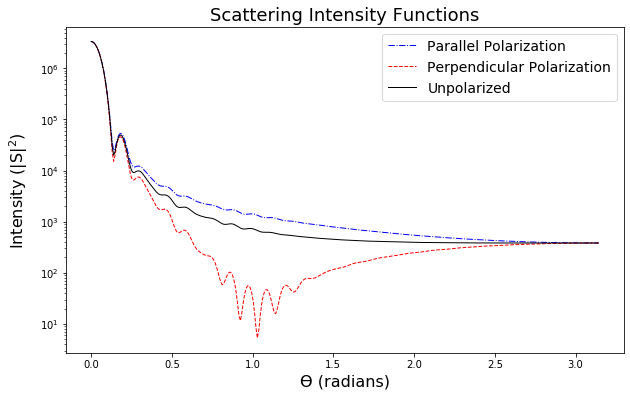

In [172]:
# attempt SF_SD function for 3 diameter bins

m=1.7+0.5j #complex refractive index
w=532 #wavelength [nm]
dp= [4000, 4500, 5000] # diameter [nm] of each bin
ndp = [10,8,5] # number of particles in each bin

# use pymiescatt to compute arrays
theta,SL,SR,SU = ps.SF_SD(m,w,dp,ndp)

# graph parallel polarization vs. theta for 3 diameters
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.semilogy(theta,SL,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.semilogy(theta,SR,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax1.semilogy(theta,SU,'k',lw=1,label="Unpolarized")

# axis labels
ax1.set_xlabel("ϴ (radians)",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
handles, labels = ax1.get_legend_handles_labels()
ax1.set_title("Scattering Intensity Functions",fontsize=18)
ax1.legend(fontsize=14)

Text(0.5, 1.0, 'MRN power law distribution of grain sizes')

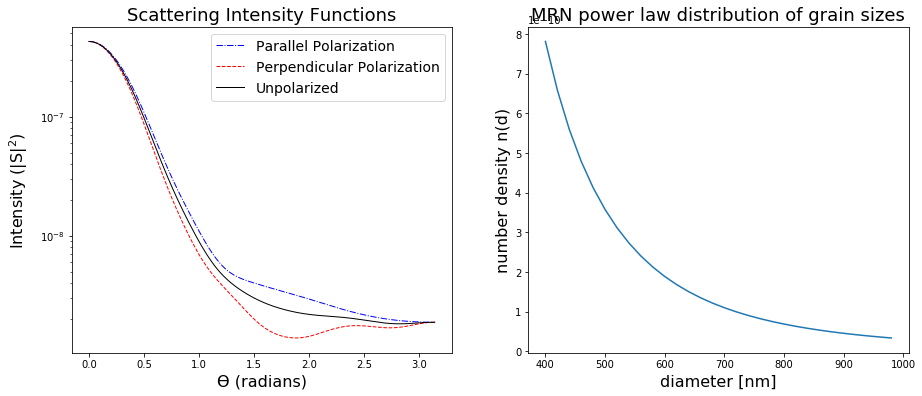

In [173]:
# SF_SD for MRN distribution of grains ranging from 0.4 to 1.0 microns diameter

m=1.7+0.5j #complex refractive index
w=532 #wavelength [nm]
dp = np.arange(400,1000,20) #[nm]
ndp = dp**(-3.5)

# use pymiescatt to compute arrays
theta,SL,SR,SU = ps.SF_SD(m,w,dp,ndp)

# graph parallel polarization vs. theta for 3 diameters
fig=plt.figure(1,figsize=(15,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.semilogy(theta,SL,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.semilogy(theta,SR,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax1.semilogy(theta,SU,'k',lw=1,label="Unpolarized")

# axis labels
ax1.set_xlabel("ϴ (radians)",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
handles, labels = ax1.get_legend_handles_labels()
ax1.set_title("Scattering Intensity Functions",fontsize=18)
ax1.legend(fontsize=14)

ax2.plot(dp,ndp)
ax2.set_xlabel("diameter [nm]",fontsize=16)
ax2.set_ylabel("number density n(d)",fontsize=16)
ax2.set_title("MRN power law distribution of grain sizes",fontsize=18)